In [1]:
import pandas as pd
from textblob import TextBlob
import csv
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
import os
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Create the novel variables

In [3]:
n =  11 #novel number
t = 'Alice_Wonderland_clusters'#novel name
s = 1 #how many rows to skip

* Get the novels from Gutenberg.
* Strip them of unwanted information.
* Tokenize the text into sentences.

In [4]:
novel = strip_headers(load_etext(n))
novel = novel.replace('\n', ' ')
novel= TextBlob(novel)
novel_sentences = novel.sentences
novel_title = t

Write the sentences to a csv file. 
-There is a bug I haven't figure out yet that requires me to write to csv twice to avoid errors.

In [5]:
for l in range(2):
    novelWriter = csv.writer(open('data/novel_'+novel_title+'.csv', 'w'), delimiter=',')
    for sentence in novel_sentences:
        novelWriter.writerow([sentence])

In [202]:
with open('data/novel_'+novel_title+'_2.csv', 'wb') as f:
    writer = csv.writer(f)
    for sentence in novel_sentences:
        writer.writerow([sentence])

Read in the csv file to pandas

In [6]:
df_novel = pd.read_csv('data/novel_'+novel_title+'.csv', skiprows = s, header=None)

In [207]:
df_novel_test = pd.read_csv('data/novel_'+novel_title+'_2.csv', header=None)

In [210]:
df_novel_test.head()
  

,0
0,ALICE'S ADVENTURES IN WONDERLAND Le...
1,Down the Rabbit-Hole Alice was beginning to g...
2,So she was considering in her own mind (as wel...
3,There was nothing so VERY remarkable in that; ...
4,Oh dear!


In [7]:
df_novel.head()

,0
0,Down the Rabbit-Hole Alice was beginning to g...
1,So she was considering in her own mind (as wel...
2,There was nothing so VERY remarkable in that; ...
3,Oh dear!
4,I shall be late!'


Create the wrd_length and total_char columns.

In [8]:
wrd_length = []
total_char = []
def wrd_char_counts(sentence):
    total_chars = 0
    wrd_counts = []
    for word in sentence:
        char_count = len(word)
        wrd_counts.append(char_count)
        total_chars += char_count
    total_char.append(total_chars)
    wrd_length.append(wrd_counts)

In [215]:
def wrd_chr(sentence):
    wrd_counts = []
    for word in sentence:
        char_count = len(word)
        wrd_counts.append(char_count)
    return wrd_counts    
        

In [225]:
nm = 'Hello Worlds'
sents = TextBlob(nm)
wrd_chr(sents.words)

TypeError: 'list' object is not callable

In [9]:
for l in df_novel[0]:
    sent = TextBlob(l)
    wrd_char_counts(sent.words)

In [228]:
nm = 'hello car'
sents = TextBlob(nm)
wrd_chr = [len(word) for word in sents.words]

In [229]:
wrd_chr

[5, 3]

In [230]:
def wrd_chrs(sentence):
    sents = TextBlob(sentences)
    return [len(word) for word in TextBlob(sentence).words]

In [237]:
def wrd_chrs(sentence):
    return [len(word) for word in TextBlob(sentence).words]

In [238]:
wrd_chrs('hello there')

[5, 5]

In [239]:
df_novel['test_chars'] = df_novel[0].apply(wrd_chrs)

In [ ]:
for l in df_novel['test_chars']:
    print sum(l)

In [248]:
df_novel['test_ch_total'] = [sum(l) for l in df_novel['test_chars']]

In [246]:
df_novel['test_ch_total'] = sum(df_novel['test_chars'])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [249]:
df_novel.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment,cluster_20,cluster_3_syl,cluster_3no_syl,cluster_5,test_char,test_chars,test_ch_total
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,"[1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, ...",83,-0.337778,1,1,0,4,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...","[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,"[1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",70,0.031250,8,1,0,4,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...","[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,"[1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, ...",39,0.650000,16,2,2,2,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...","[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109
3,Oh dear!,"[2, 4]",6,"[1, 2]",3,0.000000,11,0,1,0,"[2, 4]","[2, 4]",6
4,I shall be late!',"[1, 5, 2, 4]",12,"[1, 1, 1, 1]",4,-0.375000,7,0,1,3,"[1, 5, 2, 4]","[1, 5, 2, 4]",12


In [10]:
df_novel['wrd_length'] = wrd_length
df_novel['total_char'] = total_char

In [11]:
df_novel.head()

,0,wrd_length,total_char
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109
3,Oh dear!,"[2, 4]",6
4,I shall be late!',"[1, 5, 2, 4]",12


Create syllable count column

In [12]:
def CountSyllables(word, isName=True):
    vowels = "aeiouy"
    #single syllables in words like bread and lead, but split in names like Breanne and Adreann
    specials = ["ia","ea"] if isName else ["ia"]
    specials_except_end = ["ie","ya","es","ed"]  #seperate syllables unless ending the word
    currentWord = word.lower()
    numVowels = 0
    lastWasVowel = False
    last_letter = ""

    for letter in currentWord:
        if letter in vowels:
            #don't count diphthongs unless special cases
            combo = last_letter+letter
            if lastWasVowel and combo not in specials and combo not in specials_except_end:
                lastWasVowel = True
            else:
                numVowels += 1
                lastWasVowel = True
        else:
            lastWasVowel = False

        last_letter = letter

    #remove es & ed which are usually silent
    if len(currentWord) > 2 and currentWord[-2:] in specials_except_end:
        numVowels -= 1

    #remove silent single e, but not ee since it counted it before and we should be correct
    elif len(currentWord) > 2 and currentWord[-1:] == "e" and currentWord[-2:] != "ee" and currentWord != 'the':
        numVowels -= 1

    return numVowels

In [137]:
CountSyllables('blue')

0

In [211]:
d = {}
for l in df_novel[0]:
    sent = TextBlob(l)
    for x in sent.words:
        #print CountSyllables(x)
        #print x
        w = CountSyllables(x)
        d[x] = w
        

In [ ]:
d

In [ ]:
for l in d:
    print l

In [197]:
for l in range(2):
    sylWriter = csv.writer(open('data/novel_'+novel_title+'_syl2.csv', 'w'), delimiter=',')
    for l in d.keys():
        sylWriter.writerow([l])
        sylWriter.writerow(d[l])
       

Error: sequence expected

In [200]:
with open('data/novel_'+novel_title+'_syl2.csv', 'wb') as f:
    writer = csv.writer(f)
    for row in d.iteritems():
        writer.writerow(row)

In [ ]:
for l in d.keys():
    print d[l]
   

In [194]:
with open('data/novel_'+novel_title+'_syl.csv', 'w') as f:
    w = csv.DictWriter(f, d.keys())
    w.writeheader()
    w.writerow(d)

TypeError: writerow() takes exactly 2 arguments (1 given)

In [168]:
df_syl_words = pd.Series(d, index = None)

In [169]:
df_syl_words.head()

''Tis     1
'A        1
'ARE      1
'After    2
'Ah       1
dtype: int64

In [ ]:
for l in df_syl_words:
    print df_syl_words.index[l]

In [152]:
df_syl_words.to_csv('data/novel_'+novel_title+'syl_count.csv', index=False)

In [179]:
df_test_syl = pd.read_csv('data/novel_'+novel_title+'_syl.csv')

In [180]:
df_test_syl

,secondly,pardon,saves,knelt,four,sleep,hanging,ringlets,oldest,hate,...,tinkling,lasted,rule,pictured,hedges,extras,Suppress,lives,baked,Geography
0,3,2,1,1,1,1,2,2,2,1,...,2,1,1,2,1,2,2,1,1,3


In [156]:
df_syl_words.tail()

your        1
yours       1
yourself    2
youth       1
zigzag      2
dtype: int64

In [250]:
def syl_count(sentence):
    return [CountSyllables(l) for l in TextBlob(sentence).words]

In [252]:
df_novel['syl_test'] = df_novel[0].apply(syl_count)

In [254]:
df_novel['syl_sum_test'] = [sum(l) for l in df_novel['syl_test']]

In [255]:
df_novel.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment,cluster_20,cluster_3_syl,cluster_3no_syl,cluster_5,test_char,test_chars,test_ch_total,syl_test,syl_sum_test
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,"[1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, ...",83,-0.337778,1,1,0,4,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...","[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,"[1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, ...",83
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,"[1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",70,0.031250,8,1,0,4,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...","[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,"[1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",70
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,"[1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, ...",39,0.650000,16,2,2,2,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...","[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,"[1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, ...",39
3,Oh dear!,"[2, 4]",6,"[1, 2]",3,0.000000,11,0,1,0,"[2, 4]","[2, 4]",6,"[1, 2]",3
4,I shall be late!',"[1, 5, 2, 4]",12,"[1, 1, 1, 1]",4,-0.375000,7,0,1,3,"[1, 5, 2, 4]","[1, 5, 2, 4]",12,"[1, 1, 1, 1]",4


In [13]:
syl = []
for l in df_novel[0]:
    sent = TextBlob(l)
    syl_single = []
    for x in sent.words:
        m = CountSyllables(x)
        syl_single.append(m)
    syl.append(syl_single)  

In [14]:
syl_count_arr = []
for n in syl:
    n = np.array(n)
    syl_count_arr.append(n)

In [15]:
df_novel['syl_count'] = syl_count_arr

In [16]:
df_novel.head()

,0,wrd_length,total_char,syl_count
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,"[1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, ..."
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,"[1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ..."
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,"[1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, ..."
3,Oh dear!,"[2, 4]",6,"[1, 2]"
4,I shall be late!',"[1, 5, 2, 4]",12,"[1, 1, 1, 1]"


In [ ]:
#If novel has a lot of numbers for chapter headings.
#d = df_novel[df_novel['total_char']<=2]

Create syllable sum column

In [17]:
syl_sum = []
for l in range(0,len(df_novel)):
    syl_sum.append(df_novel['syl_count'][l].sum())

In [18]:
df_novel['syl_sum'] = syl_sum

Create sentiment column

In [19]:
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [20]:
df_novel['sentiment'] = df_novel[0].apply(detect_sentiment)

Create cluster dataframe - remove columns that can't be used

In [34]:
df_cluster = df_novel.drop('wrd_length', 1)

In [35]:
df_cluster = df_cluster.drop('syl_count', 1)

In [36]:
df_cluster.head()

,0,total_char,syl_sum,sentiment
0,Down the Rabbit-Hole Alice was beginning to g...,256,83,-0.337778
1,So she was considering in her own mind (as wel...,229,70,0.031250
2,There was nothing so VERY remarkable in that; ...,109,39,0.650000
3,Oh dear!,6,3,0.000000
4,I shall be late!',12,4,-0.375000


Create 20 clusters on scaled data

In [37]:
X = df_cluster.drop(0, axis=1)

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
km = KMeans(n_clusters=20, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [40]:
df_cluster_20 = df_cluster.copy()

In [42]:
df_cluster_20['cluster'] = km.labels_

In [43]:
df_cluster_20.head()

,0,total_char,syl_sum,sentiment,cluster
0,Down the Rabbit-Hole Alice was beginning to g...,256,83,-0.337778,1
1,So she was considering in her own mind (as wel...,229,70,0.031250,8
2,There was nothing so VERY remarkable in that; ...,109,39,0.650000,16
3,Oh dear!,6,3,0.000000,11
4,I shall be late!',12,4,-0.375000,7


In [44]:
df_cluster.head()

,0,total_char,syl_sum,sentiment
0,Down the Rabbit-Hole Alice was beginning to g...,256,83,-0.337778
1,So she was considering in her own mind (as wel...,229,70,0.031250
2,There was nothing so VERY remarkable in that; ...,109,39,0.650000
3,Oh dear!,6,3,0.000000
4,I shall be late!',12,4,-0.375000


In [45]:
df_cluster_20.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,45.286792,13.871698,0.000471
1,221.269231,68.461538,-0.162601
2,138.440000,42.720000,0.285162
3,476.000000,143.000000,0.016157
4,36.765957,11.234043,0.514696
5,53.466667,16.733333,-0.863611
6,134.804598,41.149425,-0.056712
7,36.655556,11.188889,-0.248228
8,223.033333,67.200000,0.158646


In [46]:
centers = df_cluster_20.groupby('cluster').mean()

Create Scatter plot 

In [47]:
colors = np.array(['#0000ff', '#ff00ff', '#39b54a', '#ff0000', '#ffff00', '#000080', '#ff99ff', '#88d392', '#bf0000', '#b4ff33', '#0000bf', '#800080','#1d5b25', '#4d226d', '#2b6855', '#128ab2', '#6666ff', '#a381bd', '#333333','#a0d0e0'])

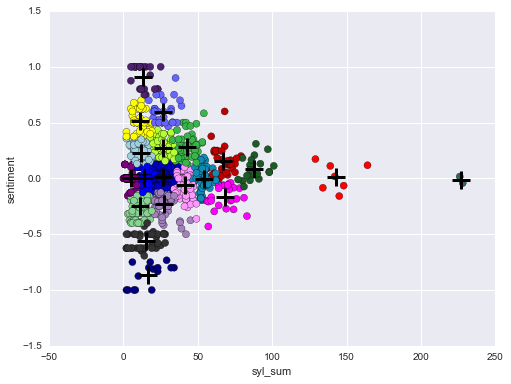

In [49]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df_cluster_20.syl_sum, df_cluster_20.sentiment, c=colors[df_cluster_20.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.syl_sum, centers.sentiment, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('syl_sum')
plt.ylabel('sentiment')

Add cluster_20 to original dataframe

In [51]:
df_novel['cluster_20'] = df_cluster_20['cluster']

In [52]:
df_novel.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment,cluster_20
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,"[1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, ...",83,-0.337778,1
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,"[1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",70,0.031250,8
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,"[1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, ...",39,0.650000,16
3,Oh dear!,"[2, 4]",6,"[1, 2]",3,0.000000,11
4,I shall be late!',"[1, 5, 2, 4]",12,"[1, 1, 1, 1]",4,-0.375000,7


Create 3 clusters

In [54]:
df_cluster_3 = df_cluster.copy()

In [55]:
df_cluster_3.head()

,0,total_char,syl_sum,sentiment
0,Down the Rabbit-Hole Alice was beginning to g...,256,83,-0.337778
1,So she was considering in her own mind (as wel...,229,70,0.031250
2,There was nothing so VERY remarkable in that; ...,109,39,0.650000
3,Oh dear!,6,3,0.000000
4,I shall be late!',12,4,-0.375000


In [56]:
X = df_cluster_3.drop(0, axis=1)

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [59]:
df_cluster_3['cluster'] = km.labels_

In [60]:
df_cluster_3.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,40.563149,12.442042,-0.051969
1,191.570281,58.751004,0.005906
2,67.583710,20.945701,0.451954


In [63]:
df_cluster_3.head()

,0,total_char,syl_sum,sentiment,cluster
0,Down the Rabbit-Hole Alice was beginning to g...,256,83,-0.337778,1
1,So she was considering in her own mind (as wel...,229,70,0.031250,1
2,There was nothing so VERY remarkable in that; ...,109,39,0.650000,2
3,Oh dear!,6,3,0.000000,0
4,I shall be late!',12,4,-0.375000,0


Add cludter_3 to original dataframe

In [64]:
df_novel['cluster_3_syl'] = df_cluster_3['cluster']

In [65]:
df_novel.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment,cluster_20,cluster_3_syl
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,"[1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, ...",83,-0.337778,1,1
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,"[1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",70,0.031250,8,1
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,"[1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, ...",39,0.650000,16,2
3,Oh dear!,"[2, 4]",6,"[1, 2]",3,0.000000,11,0
4,I shall be late!',"[1, 5, 2, 4]",12,"[1, 1, 1, 1]",4,-0.375000,7,0


Create 3 Clusters with no syl_sum

In [68]:
df_cluster_3no_syl = df_cluster.copy()

In [69]:
df_cluster_3no_syl = df_cluster.drop('syl_sum', 1)

In [70]:
X = df_cluster_3no_syl.drop(0, axis=1)

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [73]:
df_cluster_3no_syl['cluster'] = km.labels_

In [75]:
df_cluster_3no_syl.head()

,0,total_char,sentiment,cluster
0,Down the Rabbit-Hole Alice was beginning to g...,256,-0.337778,0
1,So she was considering in her own mind (as wel...,229,0.031250,0
2,There was nothing so VERY remarkable in that; ...,109,0.650000,2
3,Oh dear!,6,0.000000,1
4,I shall be late!',12,-0.375000,1


In [74]:
df_cluster_3no_syl.groupby('cluster').mean()

,total_char,sentiment
cluster,,
0,190.406375,0.002950
1,40.458009,-0.051896
2,68.213636,0.456708


Add cluster_3no_syl to original dataframe

In [76]:
df_novel['cluster_3no_syl'] = df_cluster_3no_syl['cluster']

In [77]:
df_novel.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment,cluster_20,cluster_3_syl,cluster_3no_syl
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,"[1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, ...",83,-0.337778,1,1,0
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,"[1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",70,0.031250,8,1,0
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,"[1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, ...",39,0.650000,16,2,2
3,Oh dear!,"[2, 4]",6,"[1, 2]",3,0.000000,11,0,1
4,I shall be late!',"[1, 5, 2, 4]",12,"[1, 1, 1, 1]",4,-0.375000,7,0,1


Create 5 Clusters

In [78]:
df_cluster_5 = df_cluster.copy()

In [79]:
df_cluster_5.head()

,0,total_char,syl_sum,sentiment
0,Down the Rabbit-Hole Alice was beginning to g...,256,83,-0.337778
1,So she was considering in her own mind (as wel...,229,70,0.031250
2,There was nothing so VERY remarkable in that; ...,109,39,0.650000
3,Oh dear!,6,3,0.000000
4,I shall be late!',12,4,-0.375000


In [81]:
X = df_cluster_5.drop(0, axis=1)

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [84]:
df_cluster_5['cluster'] = km.labels_

In [85]:
df_cluster_5.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,37.176063,11.400593,0.005728
1,529.555556,161.666667,0.009813
2,63.593220,19.751412,0.503936
3,56.735099,17.437086,-0.406104
4,170.338129,52.269784,0.027056


Add cluster_5 to original dataframe

In [86]:
df_novel['cluster_5'] = df_cluster_5['cluster']

In [87]:
df_novel.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment,cluster_20,cluster_3_syl,cluster_3no_syl,cluster_5
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,"[1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, ...",83,-0.337778,1,1,0,4
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,"[1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",70,0.031250,8,1,0,4
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,"[1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, ...",39,0.650000,16,2,2,2
3,Oh dear!,"[2, 4]",6,"[1, 2]",3,0.000000,11,0,1,0
4,I shall be late!',"[1, 5, 2, 4]",12,"[1, 1, 1, 1]",4,-0.375000,7,0,1,3


Write files to csv

In [88]:
df_novel.to_csv('data/novel_'+novel_title+'.csv', index=False)

In [89]:
df_test = pd.read_csv('data/novel_'+novel_title+'.csv')

In [90]:
df_test.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment,cluster_20,cluster_3_syl,cluster_3no_syl,cluster_5
0,Down the Rabbit-Hole Alice was beginning to g...,"[4, 3, 11, 5, 3, 9, 2, 3, 4, 5, 2, 7, 2, 3, 6,...",256,[1 1 3 2 1 3 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 2 1...,83,-0.337778,1,1,0,4
1,So she was considering in her own mind (as wel...,"[2, 3, 3, 11, 2, 3, 3, 4, 2, 4, 2, 3, 5, 3, 3,...",229,[1 0 1 4 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 1...,70,0.031250,8,1,0,4
2,There was nothing so VERY remarkable in that; ...,"[5, 3, 7, 2, 4, 10, 2, 4, 3, 3, 5, 5, 2, 2, 4,...",109,[1 1 2 1 2 3 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1...,39,0.650000,16,2,2,2
3,Oh dear!,"[2, 4]",6,[1 2],3,0.000000,11,0,1,0
4,I shall be late!',"[1, 5, 2, 4]",12,[1 1 1 1],4,-0.375000,7,0,1,3


Find ideal amount of clusters for novel

Find Sentiment Pattern 

20 pieces

In [114]:
df_novel.tail()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment,cluster_20,cluster_3_syl,cluster_3no_syl,cluster_5
1621,"But her sister sat still just as she left her,...","[3, 3, 6, 3, 5, 4, 2, 3, 4, 3, 7, 3, 4, 2, 3, ...",549,"[1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 1, ...",164,0.117857,3,1,0,1
1622,The long grass rustled at her feet as the Whit...,"[3, 4, 5, 7, 2, 3, 4, 2, 3, 5, 6, 7, 2, 3, 10,...",516,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, ...",148,-0.065000,3,1,0,1
1623,"So she sat on, with closed eyes, and half beli...","[2, 3, 3, 2, 4, 6, 4, 3, 4, 8, 7, 2, 10, 6, 3,...",504,"[1, 0, 1, 1, 1, 1, 0, 1, 1, 3, 2, 1, 3, 1, 0, ...",145,-0.158333,3,1,0,1
1624,"Lastly, she pictured to herself how this same ...","[6, 3, 8, 2, 7, 3, 4, 4, 6, 6, 2, 4, 5, 2, 3, ...",441,"[2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...",129,0.173333,3,1,0,1
1625,THE END,"[3, 3]",6,"[1, 1]",2,0.000000,11,0,1,0


In [91]:
df_novel['total_char'].sum()

109528

In [ ]:
ratio = (df_novel['total_char'].sum()/20) - 50

In [129]:
t = 0
x = 0
ratio = (df_novel['total_char'].sum()/20) - (.06 * (int(len(df_novel) - 1)))
# or figure out some better code. 
def find_this(t, x):
    w = 0    
    sent_stop = []
    while w <= ratio:
        w = df_novel['total_char'][t:x].sum()
        sent_stop.append(x)
        x += 1
    return max(sent_stop)     

In [130]:
t = 0
x = 0
start_point = []
stop_point = []
for n in range(1, 21):
    s = find_this(t, x)
    print "df_novel['total_char'][%s:%s]" %(t, s)
    start_point.append(t)
    stop_point.append(s)
    t = s
    x = s + 1      

df_novel['total_char'][0:60]
df_novel['total_char'][60:115]
df_novel['total_char'][115:192]
df_novel['total_char'][192:264]
df_novel['total_char'][264:352]
df_novel['total_char'][352:444]
df_novel['total_char'][444:510]
df_novel['total_char'][510:590]
df_novel['total_char'][590:657]
df_novel['total_char'][657:743]
df_novel['total_char'][743:850]
df_novel['total_char'][850:940]
df_novel['total_char'][940:1021]
df_novel['total_char'][1021:1084]
df_novel['total_char'][1084:1169]
df_novel['total_char'][1169:1278]
df_novel['total_char'][1278:1377]
df_novel['total_char'][1377:1453]
df_novel['total_char'][1453:1542]
df_novel['total_char'][1542:1624]


In [94]:
twenty_piece_char = []
st = 0
for l in start_point: 
    strt = start_point[st]
    stp = stop_point[st]
    print strt
    print stp
    mn = df_novel['sentiment'][strt:stp].mean()
    twenty_piece_char.append(mn)
    print mn
    st +=1   

0
60
0.0471425918603
60
115
0.0291150727417
115
192
-0.00841434619931
192
264
0.0203819494549
264
352
0.0321346463143
352
443
0.0297514928473
443
505
0.0152957648113
505
586
0.00289304584631
586
655
0.0117530836811
655
741
-0.0366886297918
741
843
0.0155608319717
843
938
0.0100220247589
938
1019
-0.0142449794147
1019
1078
0.0350751126508
1078
1164
0.0387175464501
1164
1272
0.0322697970111
1272
1363
0.0647142857143
1363
1446
0.0876633199465
1446
1532
0.0219613652793
1532
1623
0.0693888452817


In [95]:
n = np.array(n)
twenty_piece_char = np.array(twenty_piece_char)
print twenty_piece_char

[ 0.04714259  0.02911507 -0.00841435  0.02038195  0.03213465  0.02975149
  0.01529576  0.00289305  0.01175308 -0.03668863  0.01556083  0.01002202
 -0.01424498  0.03507511  0.03871755  0.0322698   0.06471429  0.08766332
  0.02196137  0.06938885]


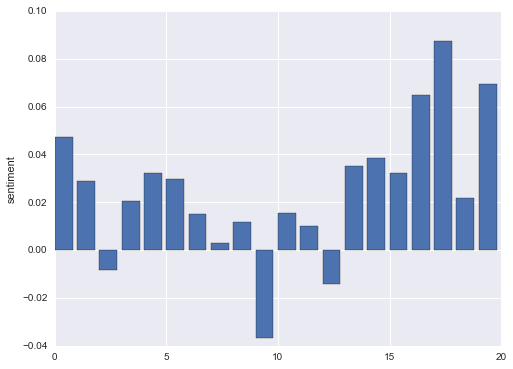

In [96]:
plt.bar(range(20), twenty_piece_char)
plt.ylabel('sentiment')
plt.show()

Create 3 piece sentiment pattern - need to fix this code for the three piece

In [97]:
df_novel.tail()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment,cluster_20,cluster_3_syl,cluster_3no_syl,cluster_5
1621,"But her sister sat still just as she left her,...","[3, 3, 6, 3, 5, 4, 2, 3, 4, 3, 7, 3, 4, 2, 3, ...",549,"[1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 1, ...",164,0.117857,3,1,0,1
1622,The long grass rustled at her feet as the Whit...,"[3, 4, 5, 7, 2, 3, 4, 2, 3, 5, 6, 7, 2, 3, 10,...",516,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, ...",148,-0.065000,3,1,0,1
1623,"So she sat on, with closed eyes, and half beli...","[2, 3, 3, 2, 4, 6, 4, 3, 4, 8, 7, 2, 10, 6, 3,...",504,"[1, 0, 1, 1, 1, 1, 0, 1, 1, 3, 2, 1, 3, 1, 0, ...",145,-0.158333,3,1,0,1
1624,"Lastly, she pictured to herself how this same ...","[6, 3, 8, 2, 7, 3, 4, 4, 6, 6, 2, 4, 5, 2, 3, ...",441,"[2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...",129,0.173333,3,1,0,1
1625,THE END,"[3, 3]",6,"[1, 1]",2,0.000000,11,0,1,0


In [123]:
t = 0
x = 0
ratio = (df_novel['total_char'].sum()/3) - (.06 * (int(len(df_novel) - 1)))
def find_this(t, x):
    w = 0    
    sent_stop = []
    while w < ratio:
        w = df_novel['total_char'][t:x].sum()
        sent_stop.append(x)
        x += 1
    return max(sent_stop)  

In [124]:
t = 0
x = 0
start_point = []
stop_point = []
for n in range(0, 3):
    s = find_this(t, x)
    print "df_novel['total_char'][%s:%s]" %(t, s)
    start_point.append(t)
    stop_point.append(s)
    t = s
    x = s + 1  

df_novel['total_char'][0:491]
df_novel['total_char'][491:1051]
df_novel['total_char'][1051:1625]


In [125]:
three_piece_char = []
st = 0
for l in start_point: 
    strt = start_point[st]
    stp = stop_point[st]
    print strt
    print stp
    mn = df_novel['sentiment'][strt:stp].mean()
    three_piece_char.append(mn)
    print mn
    st +=1

0
491
0.0215910531992
491
1051
0.00214371124287
1051
1625
0.0513489455691


In [126]:
n = np.array(n)
three_piece_char = np.array(three_piece_char)
print three_piece_char

[ 0.02159105  0.00214371  0.05134895]


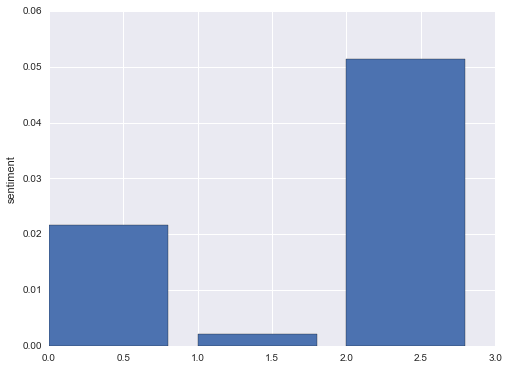

In [127]:
plt.bar(range(3), three_piece_char)
plt.ylabel('sentiment')
plt.show()

Create sentiment pattern based on ideal cluster numbers

In [263]:
import csv
with open('data/list_1.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, quotechar='|')
    for row in spamreader:
        nv = row[0]
        print nv

1342
11
1661
30254
236
84
52240
5200
98
844
345
2600
4300
52229
1322
16
74
1952
1400
2701
52225
158
174
1260
946
1184
12
120
23
135
2542
52235
52237
33644
52233
35
42
16328
768
829
28054
1112
29728
1399
2500
2554
4363
863
30601
996
28520
31284
1497
219
244
2814
21279
161
14264
20203
36
3207
205
8800
105
25305
55
